# **Machine Learning**

## 1.0 Introduction

Machine Learning is a branch of artificial intelligence (AI) and computer science which focuses on the use of data and algorithms to imitate the way that humans learn, gradually improving its accuracy. Over the last couple of decades, the technological advances in storage and processing power have enabled some innovative products based on machine learning, such as Netflix's recommendation engine and self-driving cars.

Machine learning is an important component of the growing field of data science. Through the use of statistical methods, algorithms are trained to make classifications or predictins, and to uncover key insights in data mining projects. These insights subsequently drive decision making within applications and businesses, ideally impacting key growth metrics. As big data continus to expand and grow, the market demand for data scientists will increase. They will be required to help identify the most relevant business questions and the data to answer them.

<center><img src="./deep_learning.png" /></center>

### 1.1 How Machine Learning Works?

Let's break machin learning algorithms into three main parts:

- `A Decision Process:` In general, machine learning algorithms are used to make a prediction or classification. Based on some input data, which can be labeled or unlabeled, your algorithm will produce an estimate about a pattern in the data. 

- `An Error Function:` An error function evaluates the prediction of the model. If there are known examples, an error functon can make a comparison to assess the accuracy of the model.

- `A Model Optimization Process`: If the model can fit better the data points in the training set, then weights are adjusted to reduce the discrepancy between the known example and the model estimate. The algorithm will repat this "evaluate and optimize" process, updating weigths autonomously until a threshold of accuracy has been met.

### 1.3 Machine Learning Methods

Machine learning models fall into three primary categories:

- **Supervised Machine Learning**: Is defined by its use of labeled datasets to train algorithms to classify data or predict outcomes accurately. As input data is fed into the model, the model adjusts its weights until it has been fitted appropiately. This occurs as part of the cross validation process to ensure that the model avoids **overfitting** or **underfitting**. Supervised learning helps organizations solve a variety of real-world problems at scale, such as classifyting spam in a separate folder from your inbox. Some methods used in supervised learning include neural networks, naïve bayes, linear regression, logistic regression, radom forest and support vector machine (SVM).

- **Unsupervised Machine Learning**: Is the use of machine learning algorithms to analyze and cluster unlabeled datasets. These algorithms discover hidden patterns or data groupings without the need for human intervation. This method's ability to discover similarities and differences in information make it ideal for exploratory data analysis cross-selling strategies, customer segmentation, and image and pattern recognition. It's also used to reduce the number of features in a model through the process of dimensionality reduction. Principal component analysis (PCA) and singular value decomposition (SVD) are two common approaches for this. Other algorithms used in unsupervised learning include neural networks, k-means clustering and probabilistic clustering methods.

- **Semi-supervised learning**: These methods offers a happy medium between supervised and unsupervised learning. During training, its uses a smaller labeled data set to guide classification and feature extraction from a larger, unlabeled dataset. Semi-supervised learning can solve the problem of not having enough labeled data for a supervised learning algorithm. It also helps if it's too costly to label enough data.

## 2.0 Supervised Learning

Let's start with `supervised learning` with a typical dataset, the `iris` dataset. It is a small classic dataset from Fisher (1936). One of the earliest known datasets used for evaluating classification methods.

The dataset contains 3 different classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are not linearly separable from each other. 

In [1]:
# Importing required libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

First, we need to lead the csv file with pandas!

In [2]:
df = pd.read_csv("./datasets/iris.csv") 
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


We can get some data out of the csv file without any ML.

In [3]:
df.info()
df.species.value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

Pretty cool! We can see that we have 4 features sepal length, sepal width, petal length, petal width. Then, there are no NaNs in the dataset so, we don't need to implement any strategy to remove NaNs. Finally the 3 classes are **balanced** so we don't need to worry about data **imbalance**.

We can also do some quick visuals!

<Figure size 800x600 with 0 Axes>

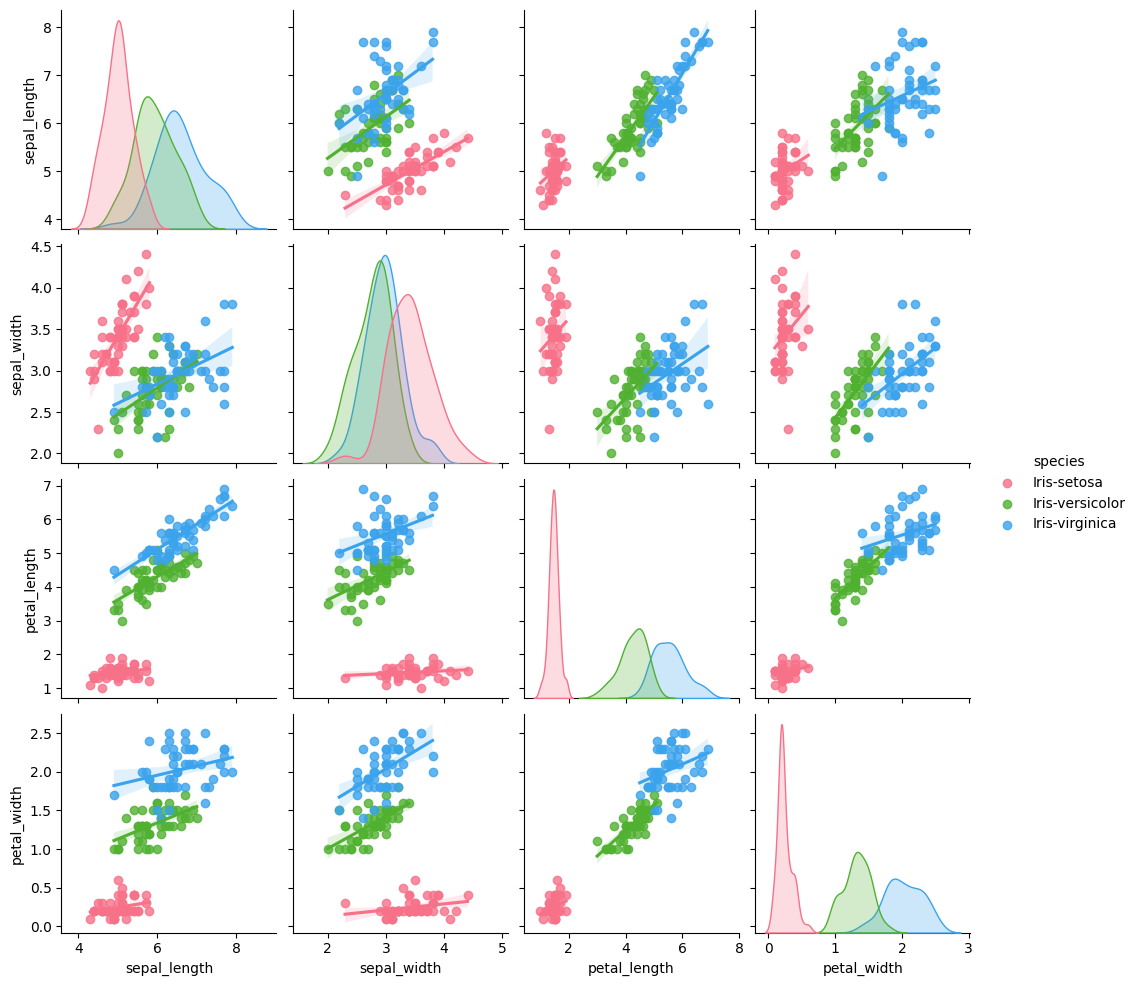

In [4]:
plt.figure(figsize=(8,6))
sns.pairplot(df, kind="reg", hue="species", palette="husl")

First things first, we need to preprocess a bit our data so the categorical targets that we have as strings "Iris-setosa" to change it to numerical values that the ML model will be able to understand.

In [5]:
from sklearn.preprocessing import LabelEncoder

lb_maker = LabelEncoder()

df["species"] = lb_maker.fit_transform(df["species"])

df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### 2.1 Classification Problem

We are going to explore this problem as a `classification problem` where the model will be able to determine to which class the data point is closest.

First we need to split our dataset into `train` and `test`, so then we will be able to train our model and validate its performance on data that haven't seen during the training.

In [6]:
# 1st split between features (input) and target (species)
x = np.array(df.iloc[:, 0:4])
y = np.array(df.species)

In [7]:
# Let's import a helper method that will allow us to split between train/test in a random way
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=42)

For our first classification model we will use the `KNeighborsClassifier`:

In [8]:
# Import the method
from sklearn.neighbors import KNeighborsClassifier

# Initialize the model
knn = KNeighborsClassifier(n_neighbors=2, algorithm="auto", leaf_size=30, metric="minkowski", metric_params=None, p=2, weights="uniform")

# Train the model
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [9]:
# Let's predict the values from the test set
y_pred = knn.predict(X_test)

In [10]:
# Let's evaluate its performance by comparing the original labels to the predicted ones
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

print(classification_report(y_test, y_pred))
print(f"The KKN model accuracy is {accuracy_score(y_pred, y_test)}")

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       0.88      1.00      0.94        23
           2       1.00      0.87      0.93        23

    accuracy                           0.96        75
   macro avg       0.96      0.96      0.96        75
weighted avg       0.96      0.96      0.96        75

The KKN model accuracy is 0.96


Pretty cool! we got so far a 96% of the test set correct!

**EXERCISE 1** Go back to the previous example a tune a bit the number of neighbours to get a better performance!

**EXERCISE 2** Do the same as above but with a new model `DecisionTreeClassifier` and compare their performances!

In [11]:
# Import sklearn tree family
from sklearn import tree

# Initialize model
clf = tree.DecisionTreeClassifier()

# Train the model
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [12]:
# Let's predict the values from the test set
y_pred = clf.predict(X_test)

In [13]:
print(f"The Decision Tree Classifier accuracy is {accuracy_score(y_pred, y_test)}")

The Decision Tree Classifier accuracy is 0.9466666666666667


The cool thing about decision trees is that we can explore the actual tree!

[Text(0.5, 0.9, 'x[2] <= 2.35\ngini = 0.662\nsamples = 75\nvalue = [21, 27, 27]'),
 Text(0.4230769230769231, 0.7, 'gini = 0.0\nsamples = 21\nvalue = [21, 0, 0]'),
 Text(0.5769230769230769, 0.7, 'x[2] <= 5.05\ngini = 0.5\nsamples = 54\nvalue = [0, 27, 27]'),
 Text(0.3076923076923077, 0.5, 'x[3] <= 1.6\ngini = 0.231\nsamples = 30\nvalue = [0, 26, 4]'),
 Text(0.15384615384615385, 0.3, 'x[2] <= 4.95\ngini = 0.077\nsamples = 25\nvalue = [0, 24, 1]'),
 Text(0.07692307692307693, 0.1, 'gini = 0.0\nsamples = 24\nvalue = [0, 24, 0]'),
 Text(0.23076923076923078, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.3, 'x[1] <= 2.9\ngini = 0.48\nsamples = 5\nvalue = [0, 2, 3]'),
 Text(0.38461538461538464, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(0.8461538461538461, 0.5, 'x[1] <= 2.75\ngini = 0.08\nsamples = 24\nvalue = [0, 1, 23]'),
 Text(0.7692307692307693, 0.3, 'x[2] <= 5.2\n

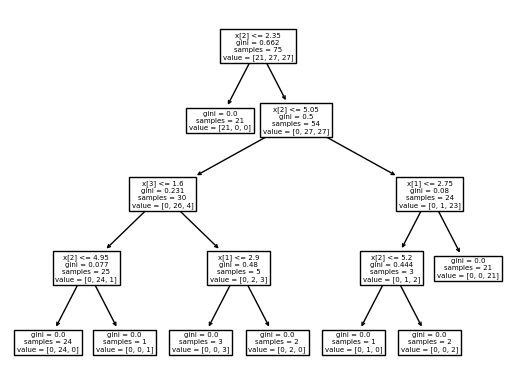

In [14]:
tree.plot_tree(clf)

### 2.2 Regression Problem

The `regression problem` is a different way to understand the task that we want to streamline with ML. Regression algorithms predict a continuous value based on the input variables. The main goal of regression problems is to estimate a mapping function based on the input and output variable. If tour target vriable is quantity like inconme, scores, height or weight, then you should use the regression model.

In [15]:
# Let's import a helper method that will allow us to split between train/test in a random way
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [16]:
# Import the LogisticRegression Model
from sklearn.linear_model import LogisticRegression

# Initialize the model
lr = LogisticRegression()

# Train the model
lr.fit(X_train, y_train)

LogisticRegression()

In [17]:
# Let's predict on the test set
y_pred = lr.predict(X_test)

In [18]:
print(f"The LogisticRegressor accuracy is {accuracy_score(y_pred, y_test)}")

The LogisticRegressor accuracy is 1.0


### 2.4 Model optimization strategies

#### 2.4.1 Hyperparameter Optimization

Hyperparameters are parameters that are not direclty learnt within estimators. In scikit-learn they are passed as argumenets to the constructor of the estimator classes. The grid search by `GridSearchCV` exhaustively generates from a grid of parameter values specified within the **param_grid** parameter.

In [35]:
# Let's import a helper method that will allow us to split between train/test in a random way
from sklearn.model_selection import train_test_split, GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Set a grid as a dictionary
grid = {"n_neighbors": np.arange(1, 50)}

# KNN model
knn = KNeighborsClassifier()

# Grid search
knn_cv = GridSearchCV(knn, grid, cv=10)

# Train
knn_cv.fit(X_train, y_train)

print("Tunned hyperparameter K:", knn_cv.best_params_)
print("Best score: ", knn_cv.best_score_)

Tunned hyperparameter K: {'n_neighbors': 11}
Best score:  0.9583333333333334


#### 2.4.2 Cross Validation

As there is never enough data to train your model, removing a part of it for validation poses a problem  of underfitting. By reducing the training data, we risk losing important patterns/trends in data set, which in turn increases error induced by bias. So, what we requiere is a method that provides ample daa for training the model and also leaves ample data for validation. K-Fold cross validation does exactly that.

In `K-Fold` cross validation, the data is divided into k subsets. Now holdout method is repeated k times, such that each time, one of the k subsets is used as the test set/validation set and the other k-1 subsets are put together to form a training set. The error estimation is averaged over all k trials to get total evectiveness of your model. As can be seen, every data point gets to be in a validation set exactly once, and gets to be in training set k-1 times. This significantly reduces bias as we are using most of the data for fitting, and also significantly reduces variance as most of the data is also being used in validation set. Interchaning the training and test sets also adds to the effectiveness of this method. As a general rule and empirical evidence, K=5 or K=10 is generally preferred.

<center><img src="./kfold_cross_validation.png" /></center>

In [32]:
# Let's import a helper method that will allow us to split between train/test in a random way
from sklearn.model_selection import train_test_split, KFold, cross_val_score

# Initialize the model
lr = LogisticRegression(max_iter=300)

scores = []
kfold = KFold(n_splits=10)
for idx, (train_index, test_index) in enumerate(kfold.split(x)):
    # Lower case to differenciate between X and x
    x_train, x_test, y_train, y_test = x[train_index], x[test_index], y[train_index], y[test_index]

    # Fit the model
    lr.fit(x_train, y_train)

    # Store scores
    scores.append(lr.score(x_test, y_test))

    print(f"Kfold: {idx} has a score of {lr.score(x_test, y_test)}")

# The scores' mean
print(f"The score's mean is {np.mean(scores)}")

Kfold: 0 has a score of 1.0
Kfold: 1 has a score of 1.0
Kfold: 2 has a score of 1.0
Kfold: 3 has a score of 1.0
Kfold: 4 has a score of 0.9333333333333333
Kfold: 5 has a score of 0.8666666666666667
Kfold: 6 has a score of 1.0
Kfold: 7 has a score of 0.8666666666666667
Kfold: 8 has a score of 0.8666666666666667
Kfold: 9 has a score of 0.9333333333333333
The score's mean is 0.9466666666666667


## 3.0 Unsupervised Learning

## 4.0 The Project!

The final project of this lecture is to use the TOX21 dataset that contains molecular `SMILES` and to train a model to able to classify a molecule as toxic or non-toxic.

The `TOX21` Data challenge has been the largest effort of the scientific community to compare computational methods for toxicity prediction. 
[[link]](https://tripod.nih.gov/tox21/challenge/data.jsp#)

Here we provide a bit of help to structure your project:

- Load both the training and test datasets CSV files and explore them
- Build a function that uses RDKit to interpret the SMILE representation present in the CSV files
- From that list of SMILES extrat the Molecular Morgan FingerPrints as representation for the molecule. [[more Help]](https://www.rdkit.org/docs/GettingStartedInPython.html)
- Choose a couple of reasonable models from scikit-learn able to classify does molecules into toxic and non-toxic.
- Train it a assess its performance by classifying the ones in the test set.
- Try to improve the model performance:
    - Cross-validation strategy
    - Hyperparameter optimization